# Toy Problem - Balances and Uncertainty - Figures Script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from scipy import stats



import openpyxl

In [2]:
sns.set(style="ticks")

In [13]:
%store -r quantities_df_store
%store -r MCresults_df_store
%store -r combined_df_long_store



In [4]:
#Restart dataframe
quantities_df = pd.DataFrame()
MCresults_df = pd.DataFrame()
combined_df_long = pd.DataFrame()


In [14]:
append = True

if append:
    quantities_df = pd.concat([quantities_df,quantities_df_store],axis=0)
    MCresults_df = pd.concat([MCresults_df, MCresults_df_store],axis=0)
    combined_df_long = pd.concat([combined_df_long,combined_df_long_store],axis=0)
else:
    
    quantities_df = quantities_df_store
    MCresults_df = MCresults_df_store
    combined_df_long = combined_df_long_store  




In [15]:
save_dataframe = True

if save_dataframe:
    filename='quantitiesMCsimulation_Test_Cement_Combined_Corrected.xlsx'
    excel_file=filename
    writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')  


    #Export quantities dataframe to excel
    quantities_df.to_excel(writer,sheet_name='QuantitiesSample',index=False) # to save it
    MCresults_df.to_excel(writer,sheet_name='MCresults',index=False) # to save it
    combined_df_long.to_excel(writer,sheet_name='Combined_Long',index=False) # to save it


    # save the workbook to a file
    writer.save()


print(f"DataFrames exported to {excel_file}")

C:\Users\em398\AppData\Local\Temp\ipykernel_21220\82484093.py:16: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


DataFrames exported to quantitiesMCsimulation_Test_Cement_Combined_Corrected.xlsx


In [16]:
combined_df_long


,Iteration,Type,Exchanges,Value,Test,Uncertainty Scenario
0,0,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
1,1,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
2,2,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
3,3,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
4,4,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
...,...,...,...,...,...,...
3995,995,Diff Score,Total - Process Level,2.687506,3,B + A (scaled)
3996,996,Diff Score,Total - Process Level,12.819568,3,B + A (scaled)
3997,997,Diff Score,Total - Process Level,-41.882578,3,B + A (scaled)
3998,998,Diff Score,Total - Process Level,9.604612,3,B + A (scaled)


In [159]:
#combined_df_long = combined_df_long[combined_df_long["Test"]<3]
#quantities_df = quantities_df[quantities_df["Test"]<3]
#combined_df_long

,Iteration,Type,Exchanges,Value,Test,Uncertainty Scenario
0,0,Quantity (kg),Product/Tech - Concrete production,2316.000000,2,B + A
1,1,Quantity (kg),Product/Tech - Concrete production,2316.000000,2,B + A
2,2,Quantity (kg),Product/Tech - Concrete production,2316.000000,2,B + A
3,3,Quantity (kg),Product/Tech - Concrete production,2316.000000,2,B + A
4,4,Quantity (kg),Product/Tech - Concrete production,2316.000000,2,B + A
...,...,...,...,...,...,...
3995,995,Diff Score,Total - Process Level,74.883852,2,B + A
3996,996,Diff Score,Total - Process Level,226.101066,2,B + A
3997,997,Diff Score,Total - Process Level,201.337049,2,B + A
3998,998,Diff Score,Total - Process Level,-154.061011,2,B + A


# Figures

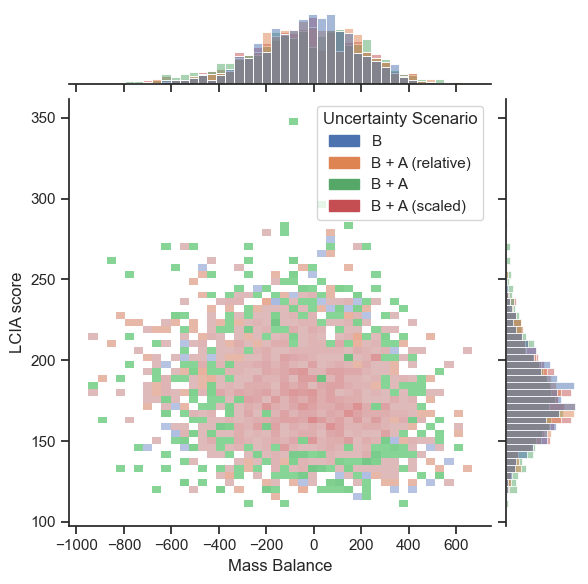

In [17]:
mb = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Value"].tolist()
us = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Uncertainty Scenario"].tolist()
score = combined_df_long[combined_df_long["Type"]=="LCIA Score"]["Value"].tolist()

data = {"Mass Balance": mb, "Uncertainty Scenario": us, "LCIA score":score}
new=pd.DataFrame(data)

joint_Result = sns.jointplot(new,x="Mass Balance", y="LCIA score",hue="Uncertainty Scenario",legend=True,kind='hist')
# Get the current axes
#ax = plt.gca()

# Create a rectangle patch
#rect = patches.Rectangle((-0.05, -0.5), 0.1,130 , linewidth=1, edgecolor='r', facecolor='none')
#ax.add_patch(rect)

#rect2 = patches.Rectangle((-0.01, -0.5), 0.02,130 , linewidth=1, edgecolor='g', facecolor='none')
#ax.add_patch(rect2)



# Add the rectangle to the plot

plt.show()


In [20]:
score = combined_df_long[combined_df_long["Type"]=="Process CO2 LCIA absolute"]

score

,Iteration,Type,Exchanges,Value,Test,Uncertainty Scenario
3000,0,Process CO2 LCIA absolute,Product/Tech - Concrete production,0.000000,0,B
3001,1,Process CO2 LCIA absolute,Product/Tech - Concrete production,0.000000,0,B
3002,2,Process CO2 LCIA absolute,Product/Tech - Concrete production,0.000000,0,B
3003,3,Process CO2 LCIA absolute,Product/Tech - Concrete production,0.000000,0,B
3004,4,Process CO2 LCIA absolute,Product/Tech - Concrete production,0.000000,0,B
...,...,...,...,...,...,...
28995,995,Process CO2 LCIA absolute,Tech - Fly-ash,1.904002,3,B + A (scaled)
28996,996,Process CO2 LCIA absolute,Tech - Fly-ash,1.742989,3,B + A (scaled)
28997,997,Process CO2 LCIA absolute,Tech - Fly-ash,1.481321,3,B + A (scaled)
28998,998,Process CO2 LCIA absolute,Tech - Fly-ash,1.679269,3,B + A (scaled)


In [21]:
mb = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Value"].tolist()
us = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Uncertainty Scenario"].tolist()
score = combined_df_long[combined_df_long["Type"]=="LCIA score"]["Value"].tolist()

data = {"Mass Balance": mb, "Uncertainty Scenario": us, "LCIA":score}
new=pd.DataFrame(data)

joint_Result = sns.jointplot(new,x="Mass Balance", y="LCIA",hue="Uncertainty Scenario",legend=True,kind='hist')
# Get the current axes
ax = plt.gca()

# Create a rectangle patch
rect = patches.Rectangle((-0.05, -0.5), 0.1,130 , linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect2 = patches.Rectangle((-0.01, -0.5), 0.02,130 , linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect2)



# Add the rectangle to the plot

plt.show()


ValueError: All arrays must be of the same length

c:\Users\em398\Anaconda3\envs\bw2test\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\em398\Anaconda3\envs\bw2test\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\em398\Anaconda3\envs\bw2test\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\em398\Anaconda3\envs\bw2test\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\em398\Anaconda3\envs\bw2test\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, 

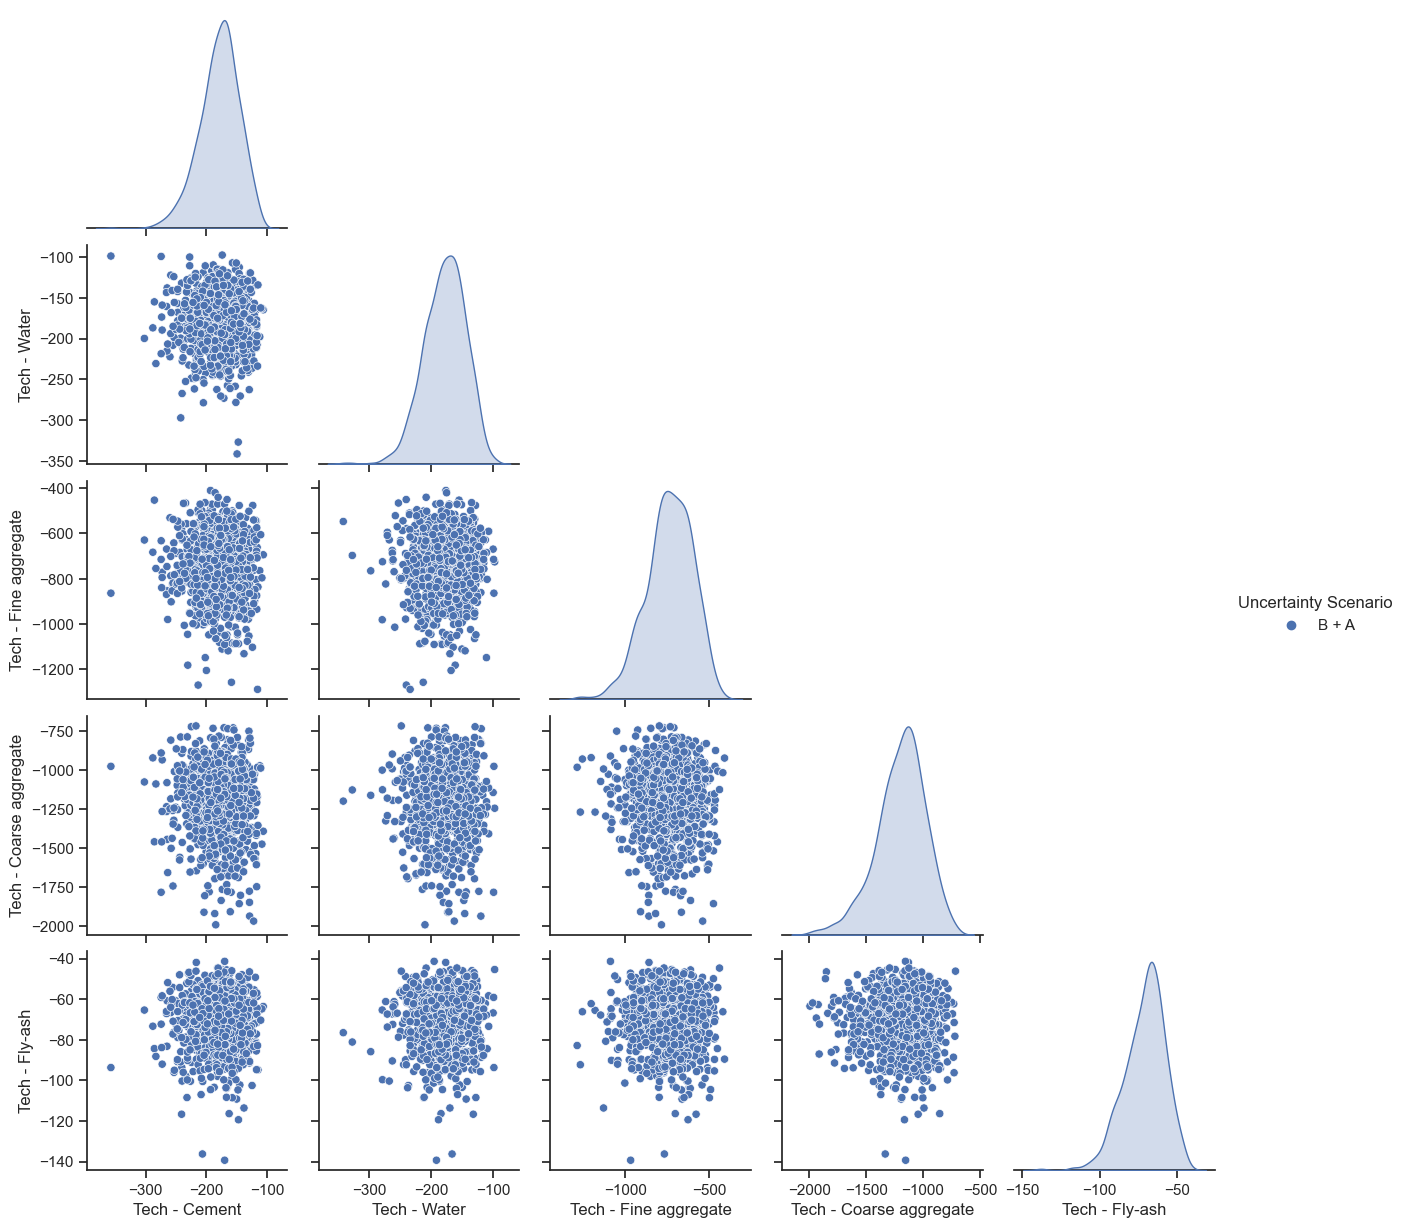

In [22]:
data = quantities_df[quantities_df["Type"]=="Quantity (kg)"] #"Quantity (kg)"
data = data[data["Test"]==2]
#columns = ["Value","Exchanges"]
#data = data[columns]
g = sns.pairplot(data,x_vars = [
'Tech - Cement',
'Tech - Water',
'Tech - Fine aggregate',
'Tech - Coarse aggregate',
'Tech - Fly-ash'
], y_vars=
[
'Tech - Cement',
'Tech - Water',
'Tech - Fine aggregate',
'Tech - Coarse aggregate',
'Tech - Fly-ash'
],hue="Uncertainty Scenario",kind="scatter",corner=True,markers=["o", "s", "D"])

# Add the rectangle to the plot

plt.show()


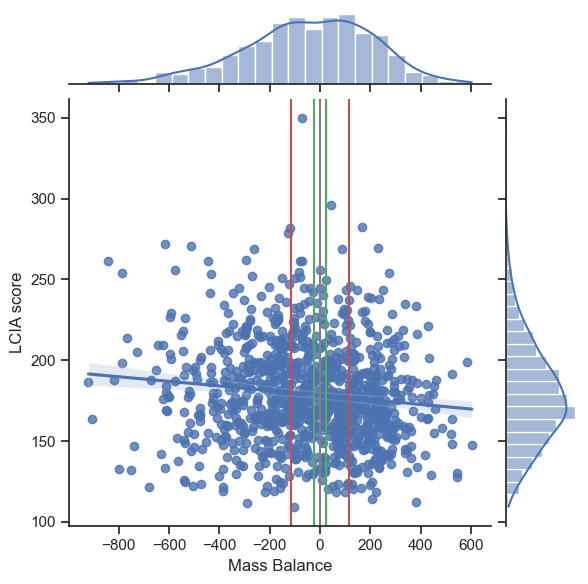

count    1000.000000
mean      -48.603819
std       255.144233
min      -920.613160
25%      -204.939240
50%       -32.875772
75%       133.469318
max       603.246428
Name: Mass Balance, dtype: float64

In [23]:
mb = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Value"].tolist()
us = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Uncertainty Scenario"].tolist()
score = combined_df_long[combined_df_long["Type"]=="LCIA Score"]["Value"].tolist()

data = {"Mass Balance": mb, "Uncertainty Scenario": us, "LCIA score":score}
new=pd.DataFrame(data)
new = new[new["Uncertainty Scenario"]=="B + A"]

joint_Result = sns.jointplot(new,x="Mass Balance", y="LCIA score",kind='reg')
# Get the current axes
ax = plt.gca()
ax.axvline(0,color='grey')
ax.axvline(-0.05*2316,color='r')
ax.axvline(0.05*2316,color='r')
ax.axvline(-0.01*2316,color='g')
ax.axvline(0.01*2316,color='g')
# Add the rectangle to the plot

plt.show()

new["Mass Balance"].describe()


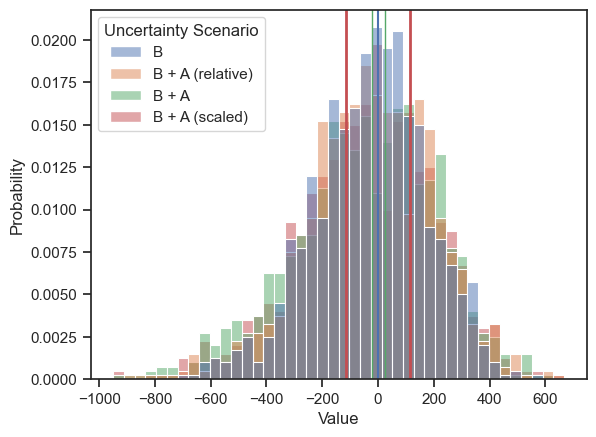

In [24]:
_x = combined_df_long[combined_df_long["Type"]=="Mass Balance"]
data= _x

graph_balance = sns.histplot(data,x=_x["Value"],hue="Uncertainty Scenario",stat='probability')

graph_balance.axvline(0)

# Get the current axes
ax = plt.gca()

# Create a rectangle patch
rect = patches.Rectangle((-0.05*2316, -0.5), 0.1*2316,300 , linewidth=2, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((-0.01*2316, -0.5), 0.02*2316,300 , linewidth=1, edgecolor='g', facecolor='none')

# Add the rectangle to the plot
ax.add_patch(rect)
ax.add_patch(rect2)

plt.show()

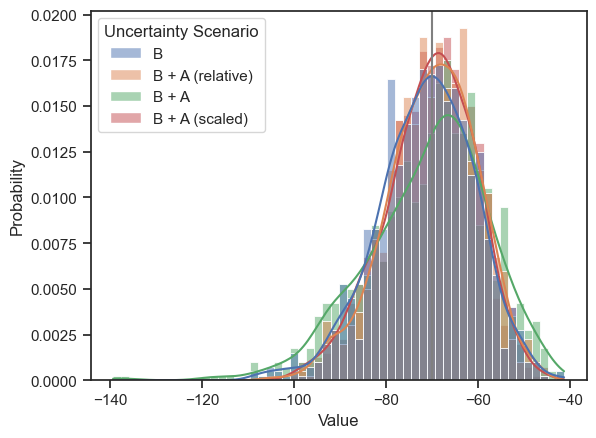

In [49]:
_x = combined_df_long[combined_df_long["Type"]=="Quantity (kg)"]
_x = _x[_x["Exchanges"]=="Tech - Fly-ash"]

data= _x

graph_balance = sns.histplot(data,x=_x["Value"],hue="Uncertainty Scenario",stat='probability',kde=True)

graph_balance.axvline(-70,color='grey')

# Get the current axes
ax = plt.gca()


plt.show()

In [26]:

cut_results01 = []
cut_results05 = []

amount = 2316
mb = combined_df_long[combined_df_long["Type"]=="Mass Balance"]
for test in range(3):
    #print(test)
    cutOffList01 = []
    cutOffList05 = []

    for value in mb[mb["Test"]==test]["Value"]:
        if (np.abs(value)/2316) <= 0.01:
            cutOff01 = True
        else:
            cutOff01 = False
        if (np.abs(value)/2316) <= 0.05:
            cutOff05 = True
        else:
            cutOff05 = False 
        
        cutOffList01.append(cutOff01)
        cutOffList05.append(cutOff05)
    
    print(cutOffList01)
    print(cutOffList05)
    cut_results01.append(cutOffList01.count(True))
    cut_results05.append(cutOffList05.count(True))
    


print("Test cut-off 0.01")
print(cut_results01)
print("Test cut-off 0.05")
print(cut_results05)

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, 

In [27]:
# Define the dimensions of the 2D array
rows = 6
cols = 3

# Create an empty 2D array filled with zeros
cut_results01 = [[0 for _ in range(cols)] for _ in range(rows)]
cut_results05 = [[0 for _ in range(cols)] for _ in range(rows)]

cutOfflists05 = pd.DataFrame()

quantity = quantities_df[quantities_df["Type"]=="Quantity (kg)"]

amount = [-2316,-176,-176,-725,-1169,-70]

for test in range(3):
    #print(test)

    quantity_test = quantity[quantity["Test"]==test]

    for index in range(0,6):
        cutOffList01 = []
        cutOffList05 = []

        for num in range(len(quantity_test)):
            
            value = quantity_test.iloc[num,index]
            ratio = np.abs((value/amount[index])-1)
            #print(ratio)
            #print(value)
            if ratio <= 0.01:
                cutOff01 = True
            else:
                cutOff01 = False
            if ratio <= 0.05:
                cutOff05 = True
            else:
                cutOff05 = False 
            
            cutOffList01.append(cutOff01)
            cutOffList05.append(cutOff05)
    
        #print(cutOffList01)
        #print(cutOffList05)
        cutOfflists05[index] = cutOffList05

        cut_results01[index][test] = (cutOffList01.count(True))
        cut_results05[index][test] = (cutOffList05.count(True))
    


print("Test cut-off 0.01")
print(cut_results01)
print("Test cut-off 0.05")
print(cut_results05)

Test cut-off 0.01
[[0, 0, 0], [53, 53, 43], [53, 58, 38], [56, 47, 39], [50, 59, 51], [55, 49, 37]]
Test cut-off 0.05
[[0, 0, 0], [291, 278, 220], [282, 254, 207], [281, 247, 195], [266, 234, 234], [274, 272, 224]]


(array([297, 401, 232,  70], dtype=int64), array([0., 1., 2., 3., 4.]))

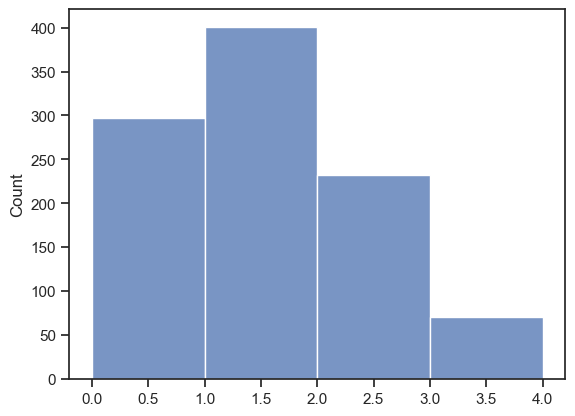

In [28]:
summary = cutOfflists05.sum(axis=1).sort_values()
summary

sns.histplot(summary, binwidth=1)
hist = np.histogram(summary,bins=4)
hist

In [29]:

rd = combined_df_long[combined_df_long["Type"]=="Rel diff"]["Value"].tolist()
us = combined_df_long[combined_df_long["Type"]=="Rel diff"]["Uncertainty Scenario"].tolist()
exc = combined_df_long[combined_df_long["Type"]=="Rel diff"]["Exchanges"].tolist()

score = combined_df_long[combined_df_long["Type"]=="Process CO2 LCIA absolute"]["Value"].tolist()
qu = combined_df_long[combined_df_long["Type"]=="Quantity (kg)"]["Value"].tolist()

data = {"Mass Balance Rel Diff": rd, "Uncertainty Scenario": us, "Quantity":qu, "LCIA score":score,"Exchanges":exc}

new=pd.DataFrame(data)

new = new[new["Uncertainty Scenario"]=="B + A"]
new = new[new["Exchanges"]!="Product/Tech - Concrete production"]


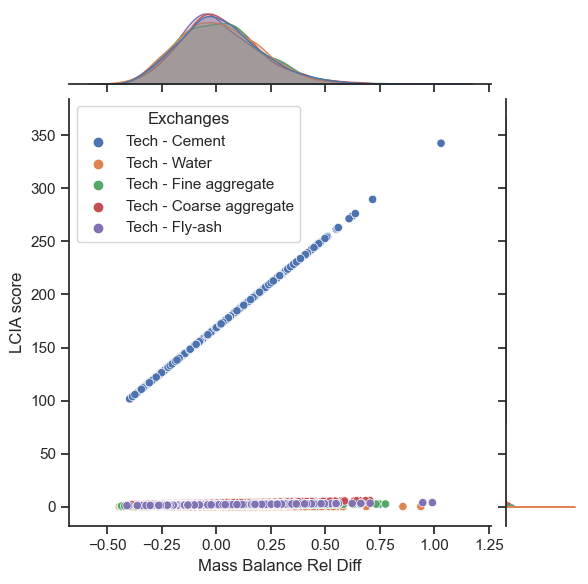

In [30]:


#plt.hist(quantities_df,bins=int(iterations/15),density=True)
graph = sns.jointplot(new,x="Mass Balance Rel Diff",y="LCIA score",hue="Exchanges")

#graph.axvline(0)

# Get the current axes
#ax = plt.gca()

# Create a rectangle patch
#rect = patches.Rectangle((-0.05, -0.5), 0.1,10 , linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the plot
#ax.add_patch(rect)

plt.show()

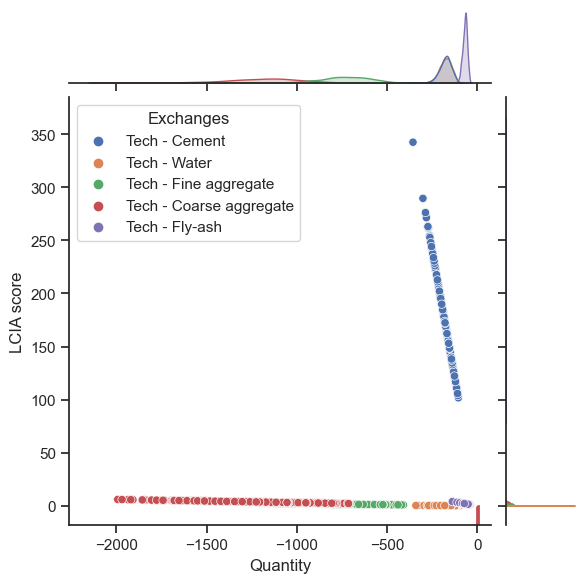

In [31]:

#plt.hist(quantities_df,bins=int(iterations/15),density=True)
graph = sns.jointplot(new,x="Quantity",y="LCIA score",hue="Exchanges")

#graph.axvline(0)

# Get the current axes
ax = plt.gca()

# Create a rectangle patch
rect = patches.Rectangle((-0.05, 0), 0.1,-1400 , linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the plot
ax.add_patch(rect)

plt.show()

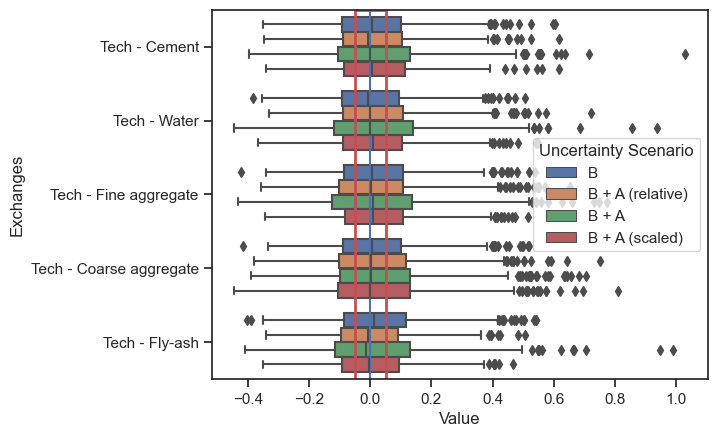

In [32]:
relDiff_df = combined_df_long[combined_df_long["Type"]=="Rel diff"]
relDiff_df = relDiff_df[relDiff_df["Exchanges"]!="Product/Tech - Concrete production"]


#plt.hist(quantities_df,bins=int(iterations/15),density=True)
graph = sns.boxplot(relDiff_df,x="Value",y="Exchanges",hue="Uncertainty Scenario",orient='h')

graph.axvline(0)

# Get the current axes
ax = plt.gca()

# Create a rectangle patch
rect = patches.Rectangle((-0.05, -0.5), 0.1,10 , linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the plot
ax.add_patch(rect)

plt.show()

In [33]:
#g = sns.FacetGrid(data=combined_df_long, col="Type",row="Exchanges")
#g.map_dataframe(sns.histplot, x="Value",kde=True,hue="Exchanges")

#plt.show()

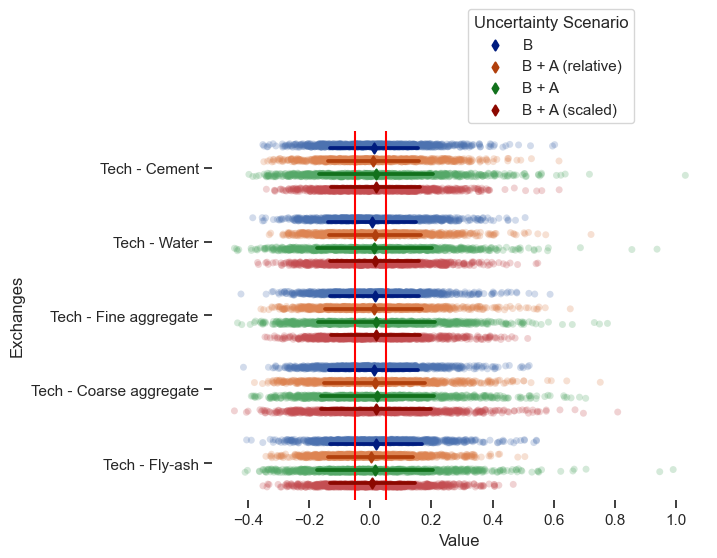

In [34]:
relDiff_df = combined_df_long[combined_df_long["Type"]=="Rel diff"]
relDiff_df = relDiff_df[relDiff_df["Exchanges"]!="Product/Tech - Concrete production"]


# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=relDiff_df, x="Value", y="Exchanges", hue="Uncertainty Scenario",
    dodge=True, alpha=.25, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
g = sns.pointplot(
    data=relDiff_df, x="Value", y="Exchanges",hue="Uncertainty Scenario",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar="sd")

#Improve the legend
sns.move_legend(
     ax, 'best', ncol=1, frameon=True,bbox_to_anchor=(.5, 1)
)

#g.axes.axvline(0, color='grey', linestyle='--')
g.axes.axvline(-0.05, color='red', linestyle='-')
g.axes.axvline(0.05, color='red', linestyle='-')


plt.show()

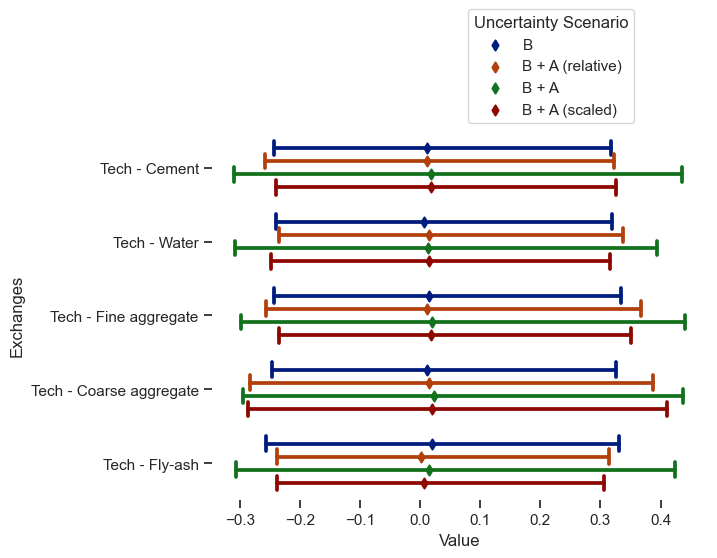

In [35]:
relDiff_df = combined_df_long[combined_df_long["Type"]=="Rel diff"]
relDiff_df = relDiff_df[relDiff_df["Exchanges"]!="Product/Tech - Concrete production"]

# Initialize the figure
f,ax = plt.subplots()
sns.despine(bottom=True, left=True)


# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=relDiff_df, x="Value", y="Exchanges",hue="Uncertainty Scenario",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=("pi",95),capsize=0.2)

#Improve the legend
sns.move_legend(
     ax, 'best', ncol=1, frameon=True,bbox_to_anchor=(.5, 1)
)

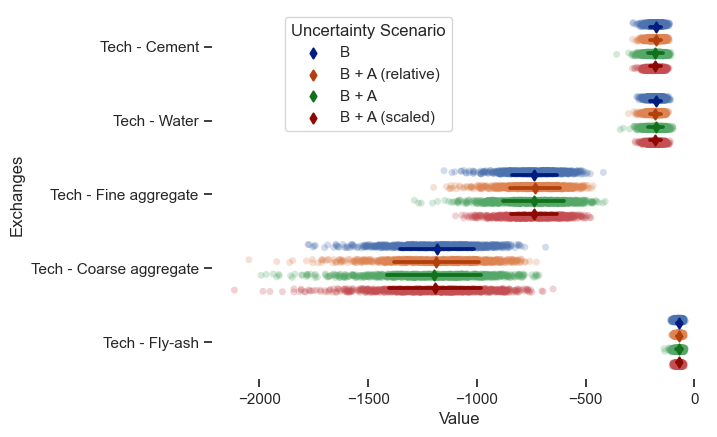

In [36]:
mass_df = combined_df_long[combined_df_long["Type"]=="Quantity (kg)"]
mass_df = mass_df[mass_df["Exchanges"]!="Product/Tech - Concrete production"]

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=mass_df, x="Value", y="Exchanges", hue="Uncertainty Scenario",
    dodge=True, alpha=.25, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=mass_df, x="Value", y="Exchanges",hue="Uncertainty Scenario",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar="sd")

#Improve the legend
sns.move_legend(
     ax, 'best', ncol=1, frameon=True,bbox_to_anchor=(.5, 1)
)

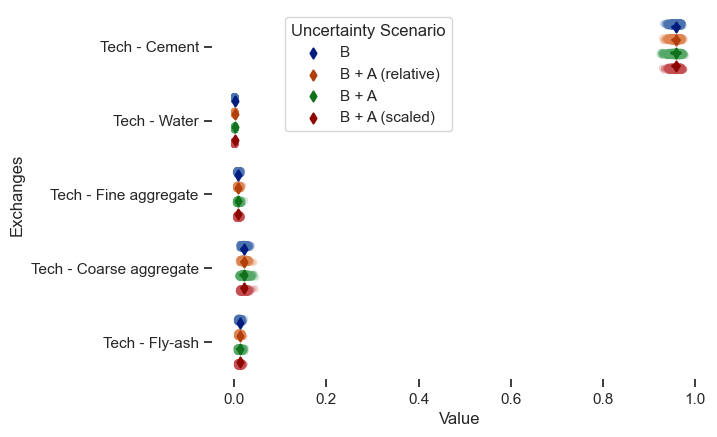

In [37]:
score_df = combined_df_long[combined_df_long["Type"].isin(["Process CO2 LCIA contribution"])]
#score_df = score_df[score_df["Test"]==1]
score_df = score_df[score_df["Exchanges"]!="Product/Tech - Concrete production"]
#score_df = score_df[score_df["Exchanges"]!="Bio - Carbon dioxide fossil"]

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=score_df, x="Value", y="Exchanges", hue="Uncertainty Scenario",
    dodge=True, alpha=.25, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=score_df, x="Value", y="Exchanges",hue="Uncertainty Scenario",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar="sd")

#Improve the legend
sns.move_legend(
     ax, 'best', ncol=1, frameon=True,bbox_to_anchor=(.5, 1)
)

<Axes: xlabel='Value', ylabel='Exchanges'>

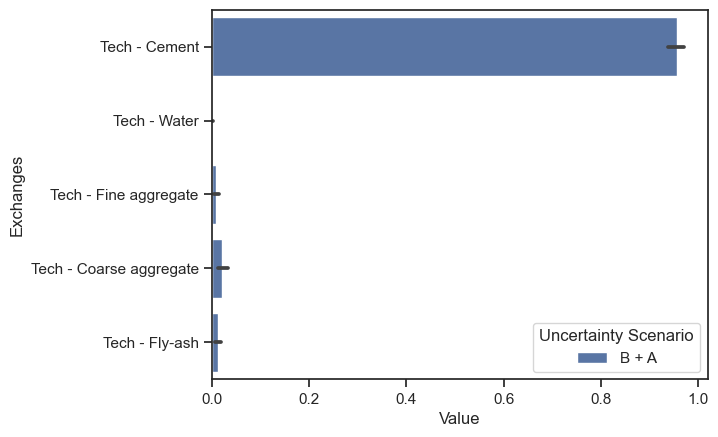

In [38]:
score_df = combined_df_long[combined_df_long["Type"].isin(["Process CO2 LCIA contribution"])]
score_df = score_df[score_df["Test"]==2]
score_df = score_df[score_df["Exchanges"]!="Product/Tech - Concrete production"]
#score_df = score_df[score_df["Exchanges"]!="Bio - Carbon dioxide fossil"]


# Show each observation with a scatterplot
sns.barplot(
    data=score_df, x="Value", y="Exchanges", hue="Uncertainty Scenario",
    orient='h', errorbar=("pi", 95)
)



In [39]:
combined_df_long

,Iteration,Type,Exchanges,Value,Test,Uncertainty Scenario
0,0,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
1,1,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
2,2,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
3,3,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
4,4,Quantity (kg),Product/Tech - Concrete production,2316.000000,0,B
...,...,...,...,...,...,...
3995,995,Diff Score,Total - Process Level,2.687506,3,B + A (scaled)
3996,996,Diff Score,Total - Process Level,12.819568,3,B + A (scaled)
3997,997,Diff Score,Total - Process Level,-41.882578,3,B + A (scaled)
3998,998,Diff Score,Total - Process Level,9.604612,3,B + A (scaled)


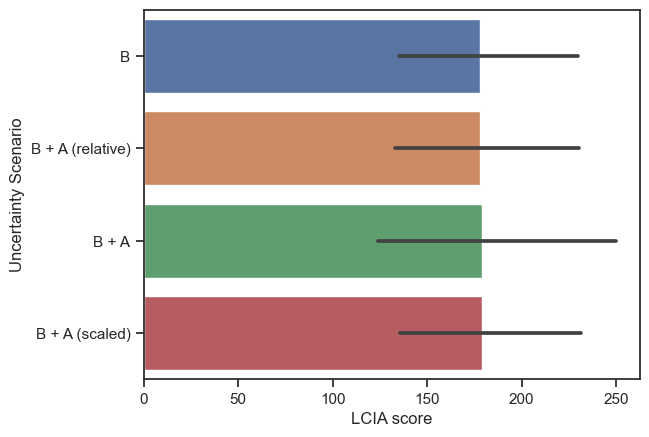

In [40]:
mb = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Value"].tolist()
qu = combined_df_long[combined_df_long["Type"]=="Quantity (kg)"]["Value"].tolist()
us = combined_df_long[combined_df_long["Type"]=="Mass Balance"]["Uncertainty Scenario"].tolist()
score = combined_df_long[combined_df_long["Type"]=="LCIA Score"]["Value"].tolist()


data = {"Mass Balance": mb, "Uncertainty Scenario": us, "LCIA score":score}
new=pd.DataFrame(data)

sns.barplot(
    data=new, x="LCIA score", y="Uncertainty Scenario", 
    orient='h', errorbar=("pi", 95)
)

plt.show()

<Axes: xlabel='Final', ylabel='Uncertainty Scenario'>

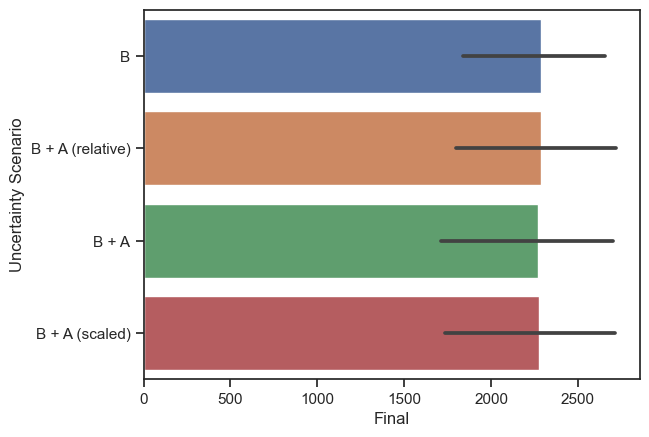

In [41]:
MCresults_df["Final"] = MCresults_df["Mass Balance"]+2316


sns.barplot(
    data=MCresults_df, x="Final", y="Uncertainty Scenario", 
    orient='h', errorbar=("pi", 95)
)

In [42]:
LCIA_contr =  quantities_df[quantities_df["Type"]=="Process CO2 LCIA contribution"]
LCIA_contr = LCIA_contr[LCIA_contr["Test"]==2]
LCIA_contr = LCIA_contr.round(5)
LCIA_contr.describe()

,Product/Tech - Concrete production,Tech - Cement,Tech - Water,Tech - Fine aggregate,Tech - Coarse aggregate,Tech - Fly-ash,Test
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,0.0,0.957483,0.001051,0.008930,0.020686,0.011850,2.0
std,0.0,0.008854,0.000270,0.002309,0.005385,0.002990,0.0
min,0.0,0.923050,0.000290,0.003380,0.008350,0.005670,2.0
25%,0.0,0.952627,0.000850,0.007360,0.016808,0.009745,2.0
50%,0.0,0.958525,0.001020,0.008690,0.020000,0.011410,2.0
75%,0.0,0.963820,0.001210,0.010183,0.023460,0.013685,2.0
max,0.0,0.978410,0.002320,0.022720,0.046920,0.023440,2.0


In [43]:
Mass_contr = quantities_df[quantities_df["Type"]=="Quantity (kg)"]
Mass_contr = Mass_contr[Mass_contr["Test"]==2].round(3)
Mass_contr.describe()


,Product/Tech - Concrete production,Tech - Cement,Tech - Water,Tech - Fine aggregate,Tech - Coarse aggregate,Tech - Fly-ash,Test
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,2316.0,-179.245755,-178.261932,-739.198388,-1196.820659,-71.077101,2.0
std,0.0,32.967326,33.188834,138.713193,215.637412,13.199892,0.0
min,2316.0,-357.406000,-341.119000,-1287.632000,-1992.909000,-139.370000,2.0
25%,2316.0,-198.759500,-200.545000,-822.999500,-1320.687250,-79.211500,2.0
50%,2316.0,-176.086500,-175.860500,-730.700000,-1171.651000,-69.115000,2.0
75%,2316.0,-157.172500,-155.156500,-633.414000,-1054.495750,-61.948750,2.0
max,2316.0,-106.160000,-97.852000,-410.333000,-714.338000,-41.354000,2.0


# Shapiro-Wilk Test
p_value < 0.05 ==>rejects null hypothesis (distribution is not normally distribution)

p_value > 0.05 ==> can't reject null hypotheses (distribution may be normally distributed)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro

C:\Users\em398\AppData\Local\Temp\ipykernel_21220\4016191861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Total Mass"] = qu["Total Mass"]
C:\Users\em398\AppData\Local\Temp\ipykernel_21220\4016191861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Iteration']=sample.index.astype(str)


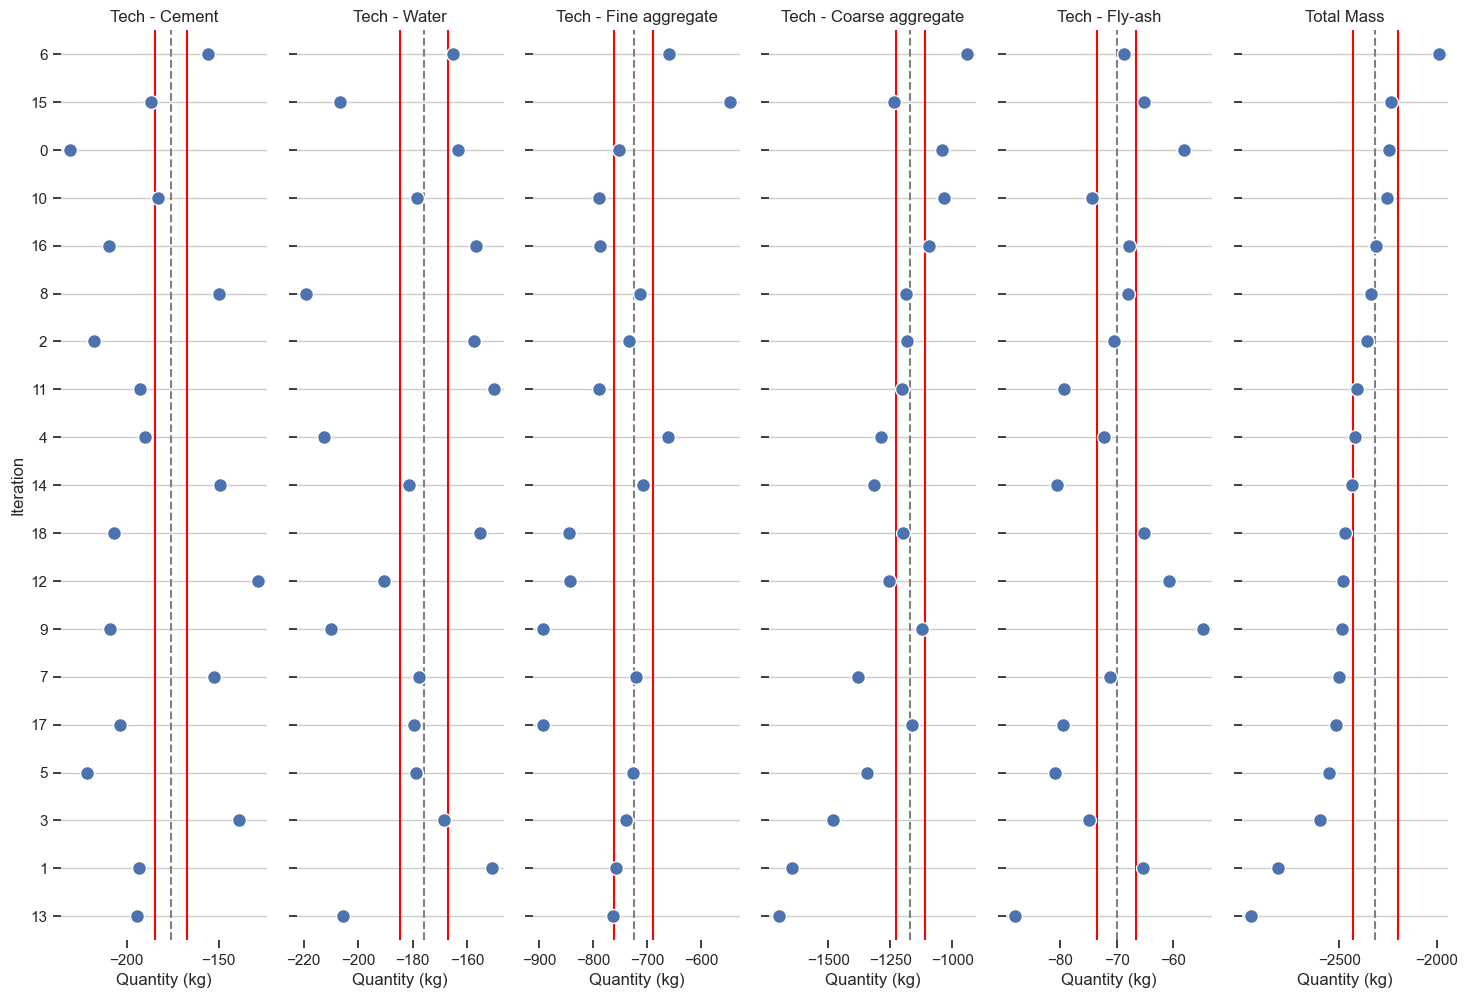

In [44]:
sample = quantities_df.iloc[0:19]
qu = sample.iloc[:,1:6]
qu["Total Mass"] = qu.sum(axis=1)
sample["Total Mass"] = qu["Total Mass"]
sample['Iteration']=sample.index.astype(str)

# Use semantically meaningful titles for the columns
titles = [
'Tech - Cement',
'Tech - Water',
'Tech - Fine aggregate',
'Tech - Coarse aggregate',
'Tech - Fly-ash',
'Total Mass'
]

line_positions = [176,176,725,1169,70,2316]

#sns.set(rc={'figure.figsize':(4, 8)})
# Make the PairGrid
g = sns.PairGrid(sample.sort_values("Total Mass",ascending=False),
                 x_vars=titles
,y_vars='Iteration',
                 height=10, aspect=.25)


# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
       linewidth=1, edgecolor="w")





# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Quantity (kg)",ylabel="Iteration")



for ax, title,line_position in zip(g.axes.flat, titles,line_positions):

    # Set a different title for each axes
    ax.set(title=title)
    
    #Set axis, vertical lines
    ax.axvline(-line_position, color='grey', linestyle='--')
    ax.axvline(-line_position*1.05, color='red', linestyle='-')
    ax.axvline(-line_position*0.95, color='red', linestyle='-')
    

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)


In [45]:
qu


,Tech - Cement,Tech - Water,Tech - Fine aggregate,Tech - Coarse aggregate,Tech - Fly-ash,Total Mass
Iteration,,,,,,
0,-230.690341,-163.213765,-751.783974,-1042.100768,-58.022078,-2245.810926
1,-193.509988,-150.964402,-757.190114,-1647.429019,-65.404435,-2814.497958
2,-217.981489,-157.309347,-732.859600,-1182.072270,-70.369920,-2360.592627
3,-138.731596,-168.377052,-738.764587,-1480.901506,-74.931213,-2601.705954
4,-189.926123,-212.698047,-660.738532,-1285.697687,-72.134179,-2421.194568
5,-221.358892,-178.901453,-726.917803,-1344.812709,-80.927325,-2552.918182
6,-155.789179,-165.332678,-658.637703,-941.107375,-68.620461,-1989.487396
7,-152.327979,-177.835880,-721.114702,-1381.888963,-71.236287,-2504.403812
8,-149.940897,-219.034287,-713.125844,-1187.656901,-68.017698,-2337.775629


In [46]:

for column in quantities_df.iloc[:,0:6]:
    columnSeriesObj = quantities_df[column]
    print('Exchange number - ', column)
    SW_value, SW_p_value = stats.shapiro(columnSeriesObj.values)
    print('SW p value ', SW_p_value) 
    if SW_p_value < 0.05:
        print('Not normally distributed')
    print('*********')

Exchange number -  Product/Tech - Concrete production
SW p value  0.0
Not normally distributed
*********
Exchange number -  Tech - Cement
SW p value  0.0
Not normally distributed
*********
Exchange number -  Tech - Water
SW p value  0.0
Not normally distributed
*********
Exchange number -  Tech - Fine aggregate
SW p value  0.0
Not normally distributed
*********
Exchange number -  Tech - Coarse aggregate
SW p value  0.0
Not normally distributed
*********
Exchange number -  Tech - Fly-ash
SW p value  0.0
Not normally distributed
*********


c:\Users\em398\Anaconda3\envs\bw2test\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Skewness


In [47]:
quantities_df.median()

#quantities_df.mean() - quantities_df.median()

C:\Users\em398\AppData\Local\Temp\ipykernel_21220\2125429978.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantities_df.median()


Product/Tech - Concrete production    0.000000
Tech - Cement                         0.466839
Tech - Water                          0.001022
Tech - Fine aggregate                 0.008565
Tech - Coarse aggregate               0.019379
Tech - Fly-ash                        0.011307
Test                                  1.500000
dtype: float64